### Математические модели динамических хаотических систем

https://habr.com/ru/articles/436014/ - Математические модели хаоса

https://ru.wikipedia.org/wiki/%D0%90%D1%82%D1%82%D1%80%D0%B0%D0%BA%D1%82%D0%BE%D1%80_%D0%9B%D0%BE%D1%80%D0%B5%D0%BD%D1%86%D0%B0 - аттрактор Лоренца

https://habr.com/ru/articles/153691/ - Немного о хаосе и о том, как его сотворить

https://habr.com/ru/articles/273915/ - Генераторы хаоса на FPGA

https://habr.com/ru/articles/592009/ - Хаос и фракталы в криптографии

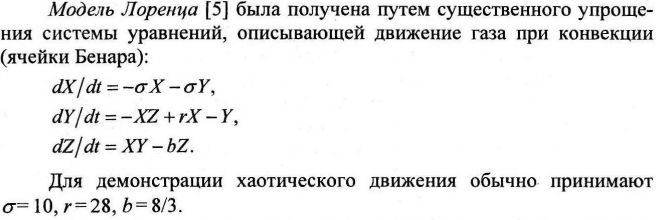

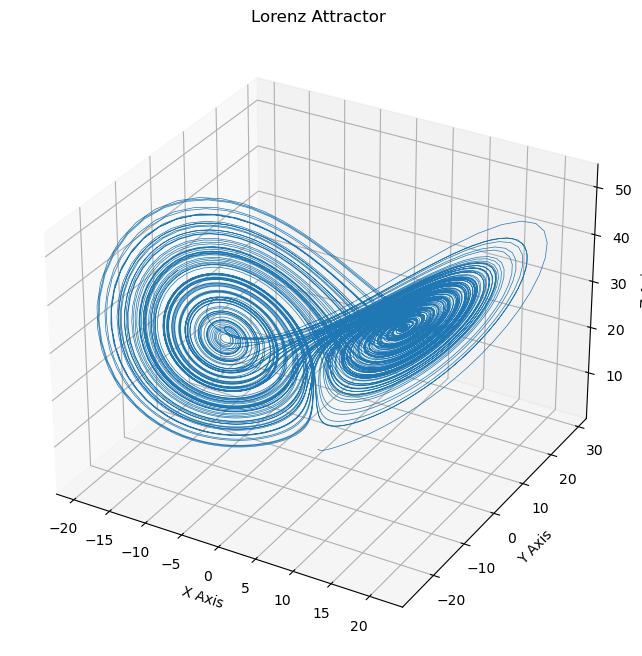

In [69]:
"""
================
Аттрактор Лоренца
================
"""
import numpy as np
import matplotlib.pyplot as plt

def lorenz(x, y, z, s=10, r=28, b=2.66667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 15000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure(figsize=(10, 8))  # Увеличиваем размеры графика до 10x8 дюймов
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.savefig('Lorenz Attractor')
plt.show()

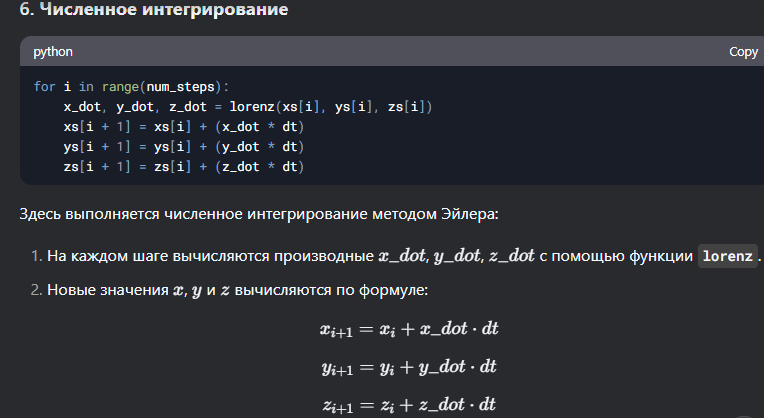

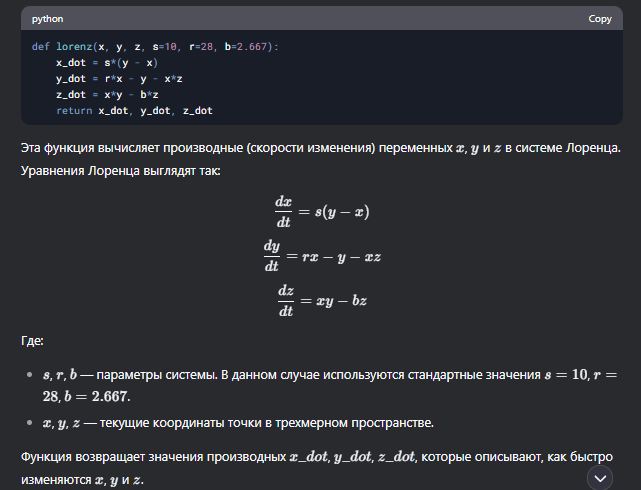

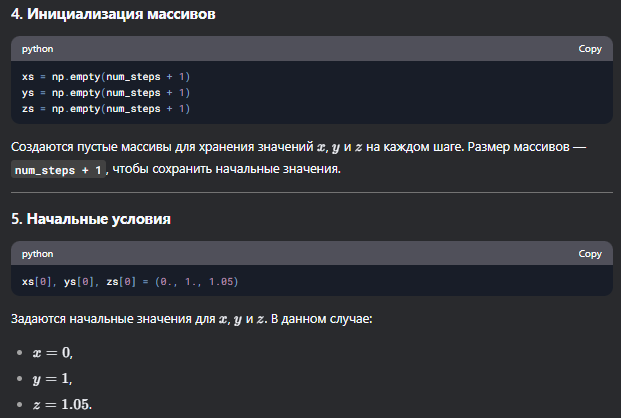

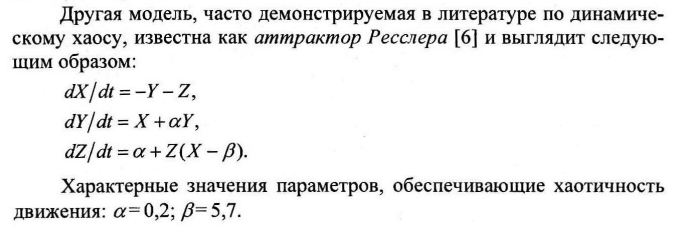

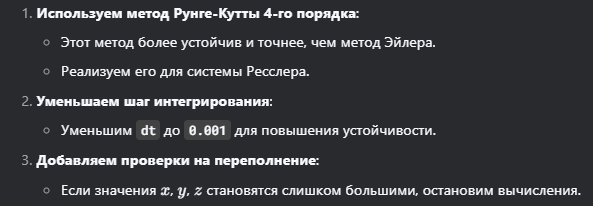

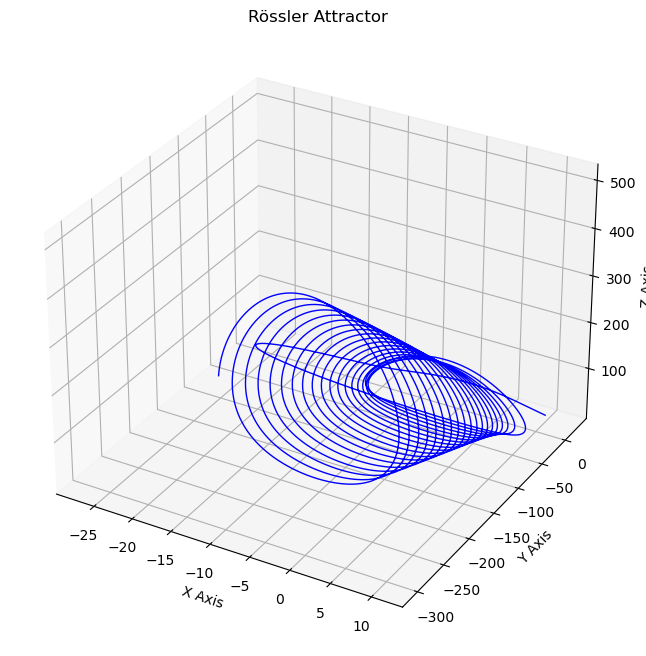

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Функция, описывающая систему уравнений Ресслера
def rossler(x, y, z, alpha=0.2, beta=5.7):
    dx_dt = -y - z
    dy_dt = x + alpha * y
    dz_dt = beta + z * (x - alpha)
    return dx_dt, dy_dt, dz_dt

# Метод Рунге-Кутты 4-го порядка
def runge_kutta_4(x, y, z, dt, alpha, beta):
    k1_x, k1_y, k1_z = rossler(x, y, z, alpha, beta)
    k2_x, k2_y, k2_z = rossler(x + 0.5 * dt * k1_x, y + 0.5 * dt * k1_y, z + 0.5 * dt * k1_z, alpha, beta)
    k3_x, k3_y, k3_z = rossler(x + 0.5 * dt * k2_x, y + 0.5 * dt * k2_y, z + 0.5 * dt * k2_z, alpha, beta)
    k4_x, k4_y, k4_z = rossler(x + dt * k3_x, y + dt * k3_y, z + dt * k3_z, alpha, beta)

    x_new = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    y_new = y + (dt / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    z_new = z + (dt / 6) * (k1_z + 2 * k2_z + 2 * k3_z + k4_z)

    return x_new, y_new, z_new

# Параметры
dt = 0.001  # Уменьшаем шаг интегрирования
num_steps = 15000  # Количество шагов

# Массивы для хранения значений x, y, z
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Начальные условия
xs[0], ys[0], zs[0] = (10, 20, 5)

# Численное интегрирование методом Рунге-Кутты 4-го порядка
for i in range(num_steps):
    xs[i + 1], ys[i + 1], zs[i + 1] = runge_kutta_4(xs[i], ys[i], zs[i], dt, alpha=0.2, beta=5.7)

    # Проверка на переполнение
    if np.isnan(xs[i + 1]) or np.isnan(ys[i + 1]) or np.isnan(zs[i + 1]):
        print("Обнаружены некорректные значения. Интегрирование остановлено.")
        break

# Построение графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, ys, zs, lw=1, color='b')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Rössler Attractor")

plt.savefig('Rössler Attractor.png')
plt.show()

### Карта Тинкербелла

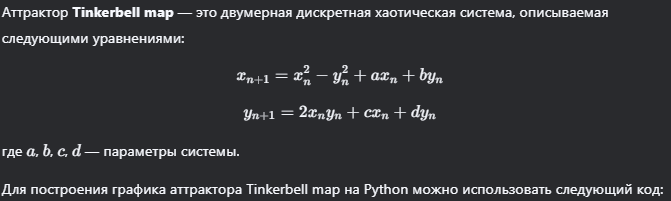

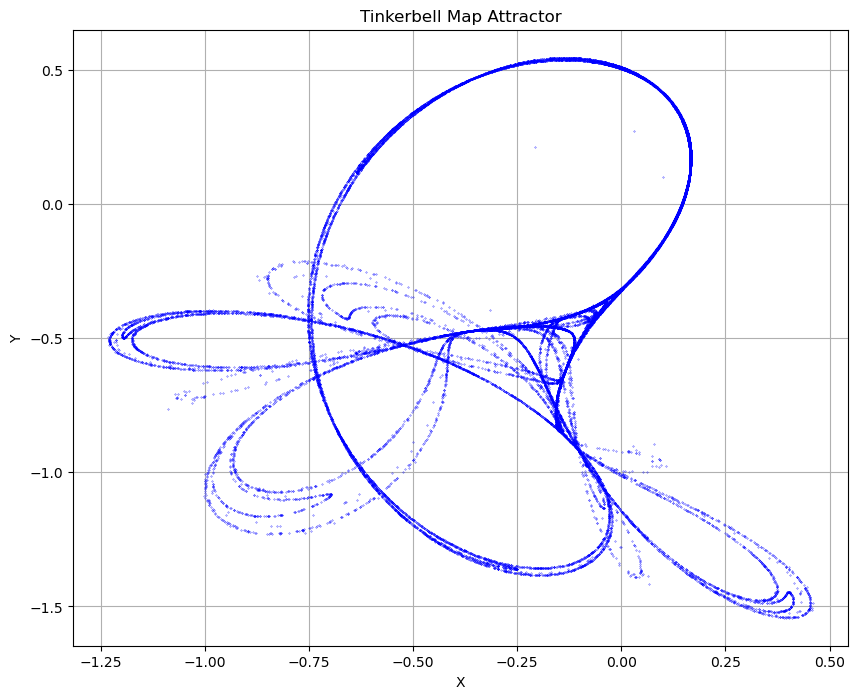

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы Tinkerbell map
a = 0.9
b = -0.6013
c = 2.0
d = 0.5

# Количество итераций
num_steps = 30000

# Массивы для хранения значений x и y
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)

# Начальные условия
xs[0], ys[0] = (0.1, 0.1)  # Начальная точка (x0, y0)

# Итерации для построения Tinkerbell map
for i in range(num_steps):
    x_next = xs[i]**2 - ys[i]**2 + a * xs[i] + b * ys[i]
    y_next = 2 * xs[i] * ys[i] + c * xs[i] + d * ys[i]
    xs[i + 1] = x_next
    ys[i + 1] = y_next

# Построение графика
plt.figure(figsize=(10, 8))
plt.plot(xs, ys, '.', markersize=0.5, color='b')
plt.title("Tinkerbell Map Attractor")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.savefig('Tinkerbell map.png')
plt.show()